In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from astropy.table import Table as Tb
%matplotlib notebook

In [2]:
from scipy import stats
import numpy as np

In [3]:
df = pd.read_excel("0803_500Microns_2ndMsmt.xlsx")
df

,Cap. Bridge (bit),Voltage steps,V(PZT)(before code),V(PZT) (after code),Voltage diff.,real_V,CH1 M-E Sensor,CH1 ME_D,CH1 ME_A_dis,CH2 M-E Sensor,CH2 ME_D,CH2 ME_A_dis,Fringes,Fringe_D,fringe_A_dis,Time
0,NaN,NaN,(monitor),(monitor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29125.0,NaN,-0.001,0.423,0.424,4.23,436.19,NaN,NaN,1313.79,NaN,NaN,NaN,NaN,NaN,10:32:00
2,29525.0,400.0,0.438,1.497,1.059,14.97,442.75,6.56,6.56,1320.11,6.32,6.32,20.0,6.3280,6.3280,10:36:00
3,29925.0,400.0,1.476,2.283,0.807,22.83,449.40,6.65,13.21,1326.53,6.42,12.74,20.0,6.3280,12.6560,10:38:00
4,30325.0,400.0,2.251,3.05,0.799,30.50,456.02,6.62,19.83,1332.91,6.38,19.12,22.0,6.9608,19.6168,10:39:00
5,30725.0,400.0,3.006,3.763,0.757,37.63,462.70,6.68,26.51,1339.36,6.45,25.57,21.0,6.6444,26.2612,10:40:00
6,31125.0,400.0,3.697,4.46,0.763,44.60,469.40,6.70,33.21,1345.83,6.47,32.04,22.0,6.9608,33.2220,10:42:00
7,31525.0,400.0,4.41,5.16,0.750,51.60,476.15,6.75,39.96,1352.34,6.51,38.55,22.0,6.9608,40.1828,10:43:00
8,31925.0,400.0,5.1,5.85,0.750,58.50,482.94,6.79,46.75,1358.89,6.55,45.10,21.0,6.6444,46.8272,10:45:00
9,32325.0,400.0,5.77,0.654,-5.116,6.54,489.76,6.82,53.57,1365.46,6.57,51.67,21.0,6.6444,53.4716,10:47:00


In [4]:
#column of sensor 1 (channel 1)
ME_A_dis_CH1 = df["CH1 ME_A_dis"][2:27]
print(ME_A_dis_CH1)

#column of sensor 2 (channel 2)
ME_A_dis_CH2 = df["CH2 ME_A_dis"][2:27]
print(ME_A_dis_CH2)

2      6.56
3     13.21
4     19.83
5     26.51
6     33.21
7     39.96
8     46.75
9     53.57
10    60.40
11    67.67
12    75.67
13    83.70
14    75.68
15    67.70
16    60.43
17    53.60
18    46.80
19    40.03
20    33.29
21    26.62
22    19.96
23    13.38
24     6.83
25     0.33
26    -6.13
Name: CH1 ME_A_dis, dtype: float64
2      6.32
3     12.74
4     19.12
5     25.57
6     32.04
7     38.55
8     45.10
9     51.67
10    58.27
11    65.29
12    73.00
13    80.75
14    73.01
15    65.31
16    58.30
17    51.72
18    45.16
19    38.62
20    32.13
21    25.69
22    19.27
23    12.92
24     6.61
25     0.35
26    -5.89
Name: CH2 ME_A_dis, dtype: float64


In [5]:
x = ME_A_dis_CH2
y = ME_A_dis_CH1

info_Sensors = stats.linregress(x,y)
info_Sensors

LinregressResult(slope=1.0367479795970886, intercept=-0.011806110089622734, rvalue=0.999999924402533, pvalue=6.0399748567611064e-80, stderr=8.40577815863399e-05, intercept_stderr=0.0037386559879828314)

<IPython.core.display.Javascript object>


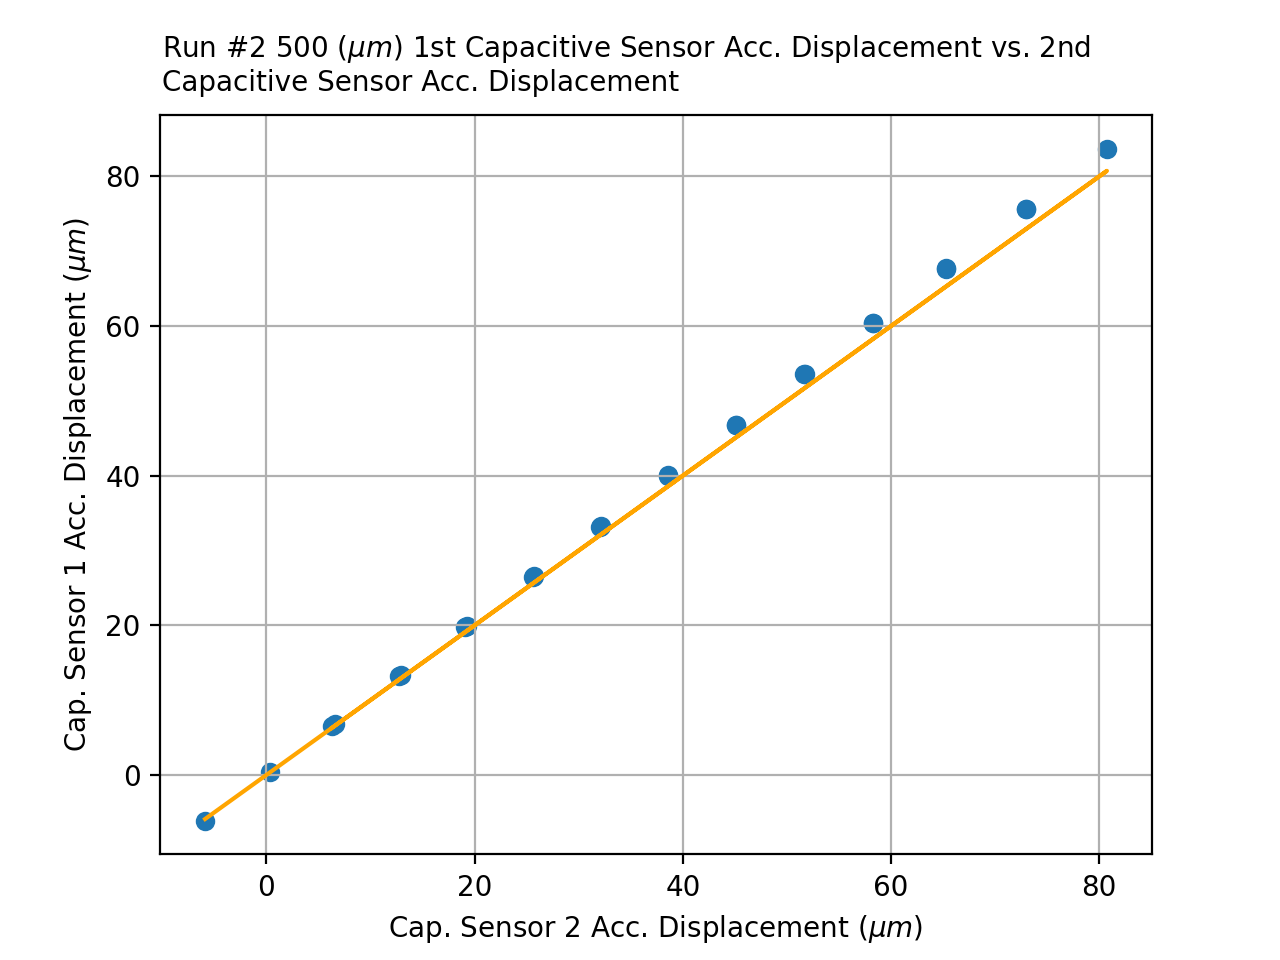

In [6]:
#plot of first sensor vs. second sensor
plt.close("all")

#plot of our reference data, channel 2
plt.plot(x,x,c = "orange")


plt.scatter(x,y)


plt.xlabel('Cap. Sensor 2 Acc. Displacement ($\mu m$)')
plt.ylabel('Cap. Sensor 1 Acc. Displacement ($\mu m$)')
t = 'Run #2 500 ($\mu m$) 1st Capacitive Sensor Acc. Displacement vs. 2nd Capacitive Sensor Acc. Displacement'
plt.text(-10, 92, t, ha='left', rotation=0, wrap=True)


plt.grid()
plt.show

#plt.savefig('Run 2 500 Microns Two Sensors.svg')